# Project: Investigating TMDB Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
> The objective of this project is to explore the TMDB movie dataset and answer questions like the genres that have been popular year by year, the properties associated with movies that have the highest revenues and the count for the most popular genres across the years.

In [1]:
# import packages

import pandas as pd
import numpy as np
import csv

<a id='wrangling'></a>
## Data Wrangling

> In this section, we will load in the data and inspect it to check for cleanliness, and then trim and clean the dataset for analysis.

> There are 10866 rows and 21 columns. Some of the columns that have rows with missing values include imdb_id(10 missing values),cast, homepage, director, tagline, keywords, overview, genres, production_companies 

In [2]:
# Load the csv data into dataframes
movies = pd.read_csv('C:/Users/Wekesa/Downloads/tmdb-movies.csv')

#Display the first five rows of the dataframe
display(movies.head())

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


> From the visual inspection of the first five rows of the movie data, we can see that there are no missing values displayed but I have a hunch that there could be some if we are to dig deeper into the data. The movies go all the way back to 1966

> An inspection of the .info() output of the dataset shows us that there are multiple columns with missing values.

### Data Cleaning

In [3]:
# Summary of the movie data to inspect
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### Taking note of dataset issues

For the movie data, the following columns have null and missing values and a lot of them.

> - imdb_id(unique identifier of the movie in the IMDB database)
> - cast(The list of actors involved in the movies)
> - homepage(The website of the movie. More than two-thirds of this data is missing)
> - director(The name of the person directing the movie)
> - tagline(the catchphrase used for the movie)
> - keywords(special words used to identify the movie)
> - overview(a brief description of what the movie is about)
> - genres(The movies category)
> - production_companies(The name of the companies that collaborated to produce the movie. Almost 10% of this data is missing).

There are a lot of potential reasons for these missing values. Was the data ever tracked? Was it lost in history? Is the research effort to make this data whole worth it? So we will take note of where the dataset isn't perfect and start
uncovering some insights

The first part of the data cleaning involves removing the duplicate rows as well as columns that will not be helpful in providing insights such as cast, tagline, overview, keywords, imdb_id, id

In [4]:
# Check the number of duplicated rows in the dataframe

sum(movies.duplicated())

1

In [5]:
# remove duplicate rows
movies.drop_duplicates(inplace = True)
sum(movies.duplicated())

0

In [6]:
#Remove unnecesary colmns
movies.drop(['id', 'imdb_id', 'cast', 'homepage', 'tagline', 'keywords', 'overview', 'release_date', 'budget', 'revenue'], axis=1,inplace=True)

In [7]:
# Checking the remaining columns of the dataframe
movies.head()

,popularity,original_title,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09


In [8]:
#Saving the edited dataframe
movies.to_csv('movies_edited.csv', index=False)

In [9]:
# Expanding genres column and adding it to the dataframe
movies_genres = movies['genres'].str.split('|', expand=True)

In [10]:
display(movies_genres)

,0,1,2,3,4
0,Action,Adventure,Science Fiction,Thriller,None
1,Action,Adventure,Science Fiction,Thriller,None
2,Adventure,Science Fiction,Thriller,None,None
3,Action,Adventure,Science Fiction,Fantasy,None
4,Action,Crime,Thriller,None,None
...,...,...,...,...,...
10861,Documentary,None,None,None,None
10862,Action,Adventure,Drama,None,None
10863,Mystery,Comedy,None,None,None
10864,Action,Comedy,None,None,None


In [11]:
# new genres column
genres_out = movies_genres.stack().droplevel(1).rename('genres')

In [12]:
display(genres_out)

0                 Action
0              Adventure
0        Science Fiction
0               Thriller
1                 Action
              ...       
10863            Mystery
10863             Comedy
10864             Action
10864             Comedy
10865             Horror
Name: genres, Length: 26955, dtype: object

In [13]:
# Remove old genres column
movies.drop(['genres'], axis=1, inplace=True)

In [14]:
# Add new genres column to the original dataframe
movies = pd.merge(movies, genres_out, left_index=True, right_index=True)

In [15]:
display(movies)

,popularity,original_title,director,runtime,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres
0,32.985763,Jurassic World,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,Action
0,32.985763,Jurassic World,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,Adventure
0,32.985763,Jurassic World,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,Science Fiction
0,32.985763,Jurassic World,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,Thriller
1,28.419936,Mad Max: Fury Road,George Miller,120,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08,Action
...,...,...,...,...,...,...,...,...,...,...,...
10863,0.065141,Beregis Avtomobilya,Eldar Ryazanov,94,Mosfilm,11,6.5,1966,0.000000e+00,0.000000e+00,Mystery
10863,0.065141,Beregis Avtomobilya,Eldar Ryazanov,94,Mosfilm,11,6.5,1966,0.000000e+00,0.000000e+00,Comedy
10864,0.064317,"What's Up, Tiger Lily?",Woody Allen,80,Benedict Pictures Corp.,22,5.4,1966,0.000000e+00,0.000000e+00,Action
10864,0.064317,"What's Up, Tiger Lily?",Woody Allen,80,Benedict Pictures Corp.,22,5.4,1966,0.000000e+00,0.000000e+00,Comedy


In [16]:
# Saving new movies dataframe
movies.to_csv('movies_genres.csv', index = False)

<a id='eda'></a>
## Exploratory Data Analysis

> Here we will answer a few questions that will help us understand our data better

### How has runtime changed over the years?

> According to Google, a movie is considered as a video that has a runtime of at least 80 minutes. So in this section, We will filter out movies that have less than 80 minutes of runtime and then look at how runtime has changed over the years.

In [38]:
#Creating runtime dataframe
movies_length = pd.read_csv('C:/Users/Wekesa/Documents/Udacity/movies_genres.csv')

In [39]:
display(movies_length)

,popularity,original_title,director,runtime,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres
0,32.985763,Jurassic World,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,Action
1,32.985763,Jurassic World,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,Adventure
2,32.985763,Jurassic World,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,Science Fiction
3,32.985763,Jurassic World,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,Thriller
4,28.419936,Mad Max: Fury Road,George Miller,120,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08,Action
...,...,...,...,...,...,...,...,...,...,...,...
26950,0.065141,Beregis Avtomobilya,Eldar Ryazanov,94,Mosfilm,11,6.5,1966,0.000000e+00,0.000000e+00,Mystery
26951,0.065141,Beregis Avtomobilya,Eldar Ryazanov,94,Mosfilm,11,6.5,1966,0.000000e+00,0.000000e+00,Comedy
26952,0.064317,"What's Up, Tiger Lily?",Woody Allen,80,Benedict Pictures Corp.,22,5.4,1966,0.000000e+00,0.000000e+00,Action
26953,0.064317,"What's Up, Tiger Lily?",Woody Allen,80,Benedict Pictures Corp.,22,5.4,1966,0.000000e+00,0.000000e+00,Comedy


In [40]:
movies_length = movies_length[movies_length['runtime']>80]

In [41]:
movies_length.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,24967.000000,24967.000000,24967.000000,24967.000000,24967.000000,2.496700e+04,2.496700e+04
mean,0.727265,106.659951,264.249569,5.930300,2000.409901,2.239993e+07,6.476432e+07
std,1.146132,26.991725,659.892576,0.900012,12.820095,3.911425e+07,1.651492e+08
min,0.000065,81.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.230847,92.000000,18.000000,5.400000,1993.000000,0.000000e+00,0.000000e+00
50%,0.420768,101.000000,46.000000,6.000000,2004.000000,1.424616e+06,0.000000e+00
75%,0.797231,114.000000,185.000000,6.500000,2010.000000,2.984110e+07,5.114865e+07
max,32.985763,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


**From the above table, most movies have an average runtime of 100 minutes or more, which is about 1.7hours and the longest movie runtimeis 900 minutes, an equivalent of 15 hours.**

In [53]:
# import matplotlib and set plotting style

import seaborn as sns
sns.set(color_codes=True)
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

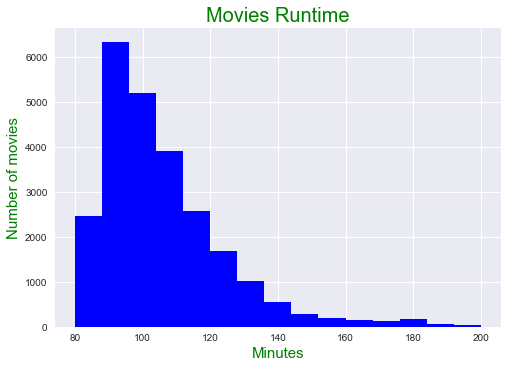

In [42]:
#Showing runtime distribution overtime
plt.hist(movies_length['runtime'], range=(80,200), bins=15, color='blue')
plt.xlabel('Minutes', fontsize=15, color='green')
plt.ylabel('Number of movies', fontsize=15, color='green')
plt.title('Movies Runtime', fontsize=20, color='green')
plt.show()

> **From the above histogram, it is clear that majority of the movies have a runtime of between 90 minutes and 110 minutes**

In [43]:
grouped_movies = movies_length['runtime'].groupby(movies_length['release_year']).describe()

In [44]:
avg_runtime_by_year = grouped_movies['mean']
avg_runtime_min = grouped_movies['mean'] - grouped_movies['std']
avg_runtime_max = grouped_movies['mean'] + grouped_movies['std']

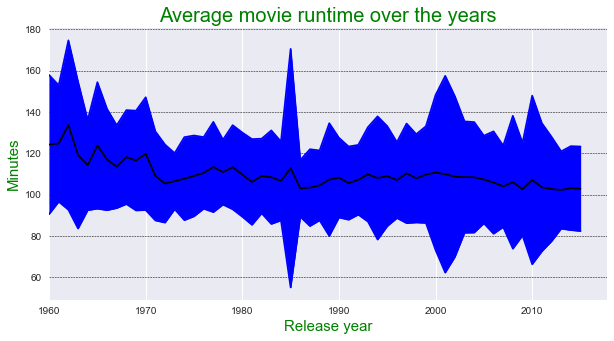

In [77]:
fig, x=plt.subplots(figsize=(10,5))
x.plot(avg_runtime_by_year, color='black')
x.plot(avg_runtime_min, color='blue')
x.plot(avg_runtime_max, color='blue')
x.fill_between(grouped_movies.index, avg_runtime_min, avg_runtime_max, color='blue')
x.set_title('Average movie runtime over the years', fontsize=20, color='green')
x.set_xlabel('Release year', fontsize=15, color='green')
x.set_ylabel('Minutes', fontsize=15, color='green')
plt.grid(axis = 'y', color = 'black', linestyle = '--', linewidth = 0.5);
x.set_xlim(1960)
plt.show()

**Over the years, the average runtime of movies has been around 100 minutes and has not really changed much**

In [46]:
movies_by_decades = movies_length.copy()
movies_by_decades['release_year']=((movies_by_decades['release_year']//10)*10).astype('int64')

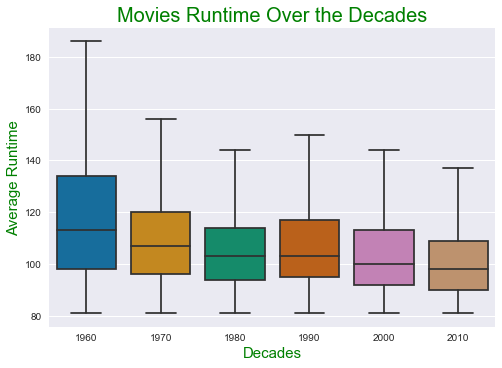

In [35]:
sns.boxplot(x='release_year', y='runtime', data=movies_by_decades, palette='colorblind', showfliers=False)
plt.xlabel('Decades', fontsize=15, color='green')
plt.ylabel('Average Runtime', fontsize=15, color='green')
plt.title('Movies Runtime Over the Decades', fontsize=20, color='green')
plt.show()

**The box plot above just confirms further that the average runtime of movies has not changed significantly by the decades but there was a significant change in the decade leading to 1970**

### Longest movie in the Dataset?

In [47]:
print(movies_length.original_title[movies_length.runtime == movies_length.runtime.max()])
print(movies_length.runtime[movies_length.runtime == movies_length.runtime.max()])

9283    The Story of Film: An Odyssey
Name: original_title, dtype: object
9283    900
Name: runtime, dtype: int64


### Shortest Movie in the Dataset?

In [50]:
print(movies.original_title[movies.runtime == movies.runtime.min()])
print(movies.runtime[movies.runtime == movies.runtime.min()])

92      Mythica: The Necromancer
92      Mythica: The Necromancer
92      Mythica: The Necromancer
334                      Ronaldo
410               Anarchy Parlor
                  ...           
6552             Quatre Ã©toiles
6934               Jean-Philippe
8874             Mission Kashmir
8874             Mission Kashmir
8874             Mission Kashmir
Name: original_title, Length: 61, dtype: object
92      0
92      0
92      0
334     0
410     0
       ..
6552    0
6934    0
8874    0
8874    0
8874    0
Name: runtime, Length: 61, dtype: int64


### Which genres are most popular from year to year?

In [57]:
movies = pd.read_csv('movies_genres.csv')
movies.head()

,popularity,original_title,director,runtime,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres
0,32.985763,Jurassic World,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,Action
1,32.985763,Jurassic World,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,Adventure
2,32.985763,Jurassic World,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,Science Fiction
3,32.985763,Jurassic World,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,Thriller
4,28.419936,Mad Max: Fury Road,George Miller,120,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08,Action


In [58]:
#filter dataframe based on genres and release year then sort by finding popularity mean
movies_filtered = movies.groupby(['release_year', 'genres'], as_index=False)['popularity'].mean()
movies_filtered = movies_filtered.sort_values(['release_year', 'popularity'], ascending = [False, False]).reset_index(drop=True)
movies_filtered.iloc[0]

release_year         2015
genres          Adventure
popularity       3.283786
Name: 0, dtype: object

In [59]:
# Find highest popularity mean
movies_refiltered = pd.DataFrame()
for x in list(range(1966, 2015)):
    y = movies_filtered.query(f'release_year == {x}').head(1)
    movies_refiltered = pd.concat([movies_refiltered, y], axis=0).reset_index(drop=True)
movies_refiltered.head()

,release_year,genres,popularity
0,1966,Animation,0.585717
1,1967,Animation,1.348805
2,1968,Mystery,1.519456
3,1969,Crime,0.948020
4,1970,Animation,1.127719


In [60]:
# saving the dataframe
movies_refiltered.to_csv('movies_genres2.csv', index=False)

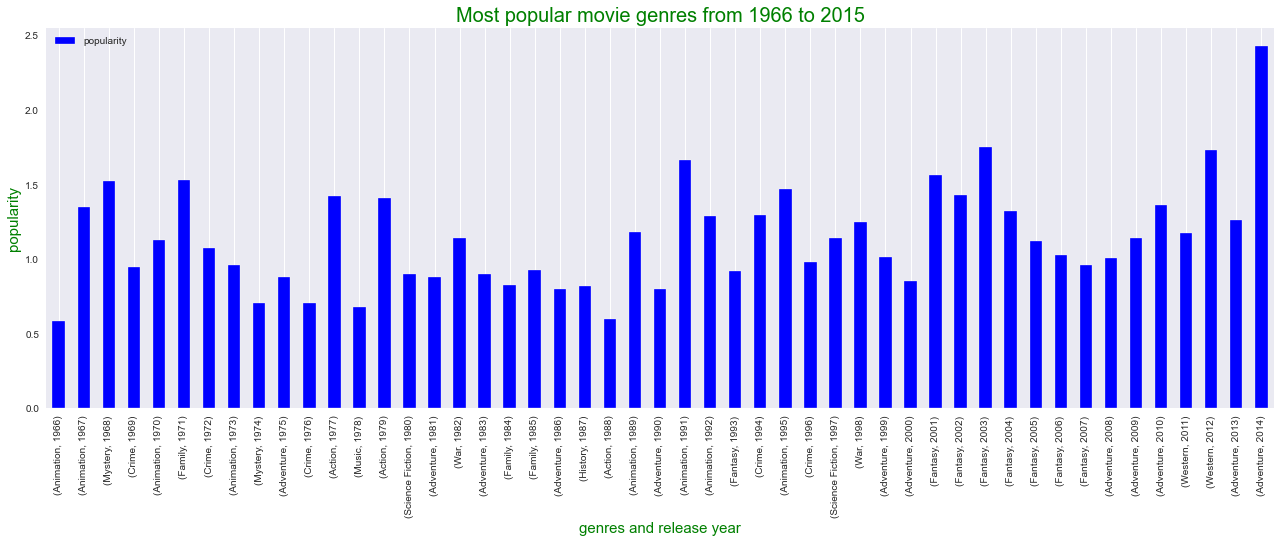

In [61]:
# Load genres dataframe
movies = pd.read_csv('movies_genres2.csv')

movies.set_index(['genres','release_year']).plot(kind = 'bar', figsize = (22,7), color= 'blue')
plt.xlabel('genres and release year', fontsize = 15, color = 'green')
plt.ylabel('popularity', fontsize = 15, color = 'green')
plt.legend()
plt.title('Most popular movie genres from 1966 to 2015',fontsize = 20, color = 'green')
plt.grid(axis = 'y');

### Which were the top movie genres overall?

> This is the list of the top movie genres throughout the years 1966 to 2015

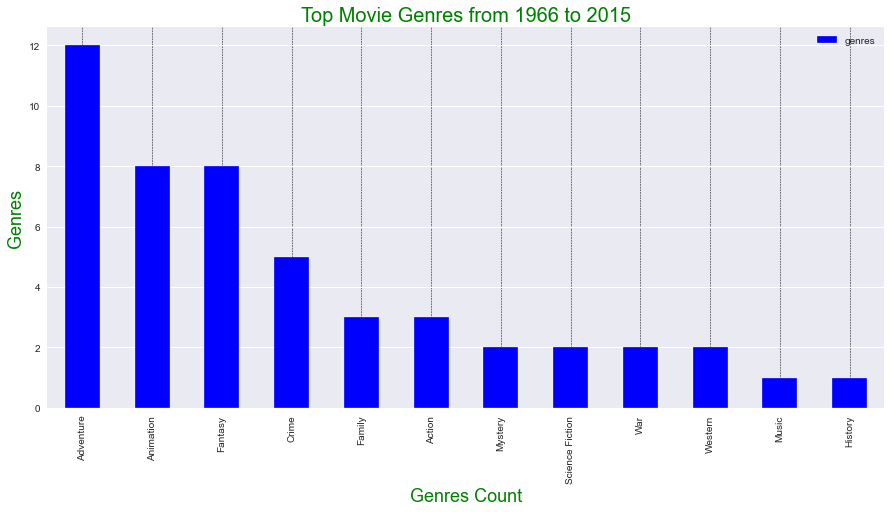

In [62]:
movies.genres.value_counts().plot(kind = 'bar', color = 'blue', figsize = (15,7))
plt.title('Top Movie Genres from 1966 to 2015',fontsize = 20, color = 'green')
plt.xlabel('Genres Count', fontsize=18, color = 'green')
plt.ylabel('Genres', fontsize = 18, color = 'green')
plt.legend()
plt.grid(axis = 'x', color = 'black', linestyle = '--', linewidth = 0.5);

### Which properties are associated with movies that have high revenues?

In [63]:
#Load genres dataframe
movies = pd.read_csv('movies_genres.csv')
movies.head()

,popularity,original_title,director,runtime,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres
0,32.985763,Jurassic World,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,Action
1,32.985763,Jurassic World,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,Adventure
2,32.985763,Jurassic World,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,Science Fiction
3,32.985763,Jurassic World,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,Thriller
4,28.419936,Mad Max: Fury Road,George Miller,120,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08,Action


### Since we already know that the revenue and budget columns have no null values, We will check for the number of zero values that exist as these will affect the accuracy of our findings

In [64]:
#checking for zero values
movies['revenue_adj'].describe()

count    2.695500e+04
mean     6.088986e+07
std      1.615305e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      4.376460e+07
max      2.827124e+09
Name: revenue_adj, dtype: float64

In [65]:
movies['budget_adj'].describe()

count    2.695500e+04
mean     2.103946e+07
std      3.820031e+07
min      0.000000e+00
25%      0.000000e+00
50%      1.823126e+02
75%      2.704173e+07
max      4.250000e+08
Name: budget_adj, dtype: float64

In [66]:
# Removing zero values in revenue
movies = movies[movies.revenue_adj != 0]

In [67]:
movies['revenue_adj'].describe()

count    1.266400e+04
mean     1.296025e+08
std      2.159459e+08
min      2.370705e+00
25%      1.323018e+07
50%      5.083352e+07
75%      1.526580e+08
max      2.827124e+09
Name: revenue_adj, dtype: float64

In [68]:
# Saving the dataframe
movies.to_csv('movies2.csv', index=False)

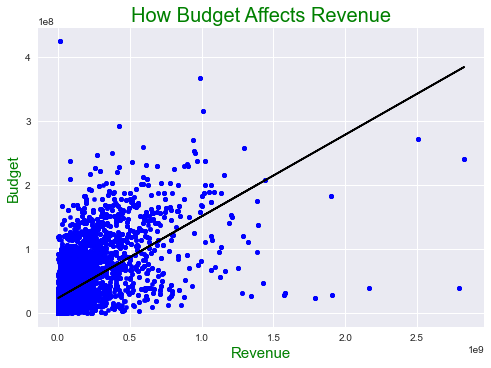

In [69]:
# Load new movies dataframe
movies = pd.read_csv('movies2.csv')

#Remove zero values from budget and plotting
def budget_to_revenue(movies):
    movies[movies.budget_adj != 0].plot(y='budget_adj', x= 'revenue_adj', kind = 'scatter', color = 'blue')
    y = movies.budget_adj
    x = movies.revenue_adj
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x+b, color = 'black');
    plt.title('How Budget Affects Revenue', fontsize = 20, color = 'green')
    plt.xlabel('Revenue', fontsize=15, color = 'green')
    plt.ylabel('Budget', fontsize = 15, color = 'green')
budget_to_revenue(movies)

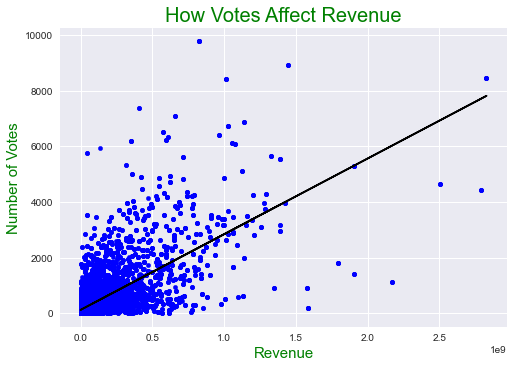

In [70]:
# plotting vote count effect on revenue
def vote_revenue(movies):
    movies.plot(y='vote_count', x= 'revenue_adj', kind = 'scatter',color = 'blue')
    y= movies.vote_count
    x = movies.revenue_adj
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x+b, color = 'black')
    plt.title('How Votes Affect Revenue', fontsize = 20, color = 'green')
    plt.xlabel('Revenue', fontsize=15, color = 'green')
    plt.ylabel('Number of Votes', fontsize = 15, color = 'green')
vote_revenue(movies)

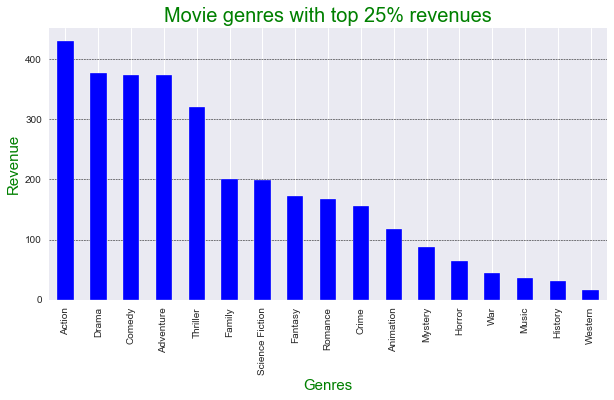

In [71]:
# New dataframe with the top 25% of movies revenue and their genres
def top_genres_count(movies):
    movies_g = movies.query('revenue_adj >= 1.526580e+08')
    movies_g['genres'].value_counts().plot(kind = 'bar', color = 'blue',figsize = (10,5));
top_genres_count(movies)
plt.title('Movie genres with top 25% revenues', fontsize = 20, color = 'green')
plt.xlabel('Genres', fontsize=15, color = 'green')
plt.ylabel('Revenue', fontsize = 15, color = 'green')
plt.grid(axis = 'y',color = 'black', linestyle = '--', linewidth = 0.5)

> From the above chart, action and drama genres generate the most revenues while history and western generate relatively lower revenue

### What is the correlation between the attributes in the dataset?

> A new column profit will be added to the dataset by getting the difference between revenue and budget

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
popularity,1.000000,0.193725,0.778432,0.302104,0.189791,0.432808,0.561655,0.524926
runtime,0.193725,1.000000,0.251052,0.306085,-0.100581,0.291961,0.259424,0.219892
vote_count,0.778432,0.251052,1.000000,0.372470,0.224765,0.539583,0.673720,0.624657
vote_average,0.302104,0.306085,0.372470,1.000000,-0.094387,0.065612,0.263226,0.279656
release_year,0.189791,-0.100581,0.224765,-0.094387,1.000000,0.121777,-0.070782,-0.109381
budget_adj,0.432808,0.291961,0.539583,0.065612,0.121777,1.000000,0.585266,0.412398
revenue_adj,0.561655,0.259424,0.673720,0.263226,-0.070782,0.585266,1.000000,0.980042
profit,0.524926,0.219892,0.624657,0.279656,-0.109381,0.412398,0.980042,1.000000


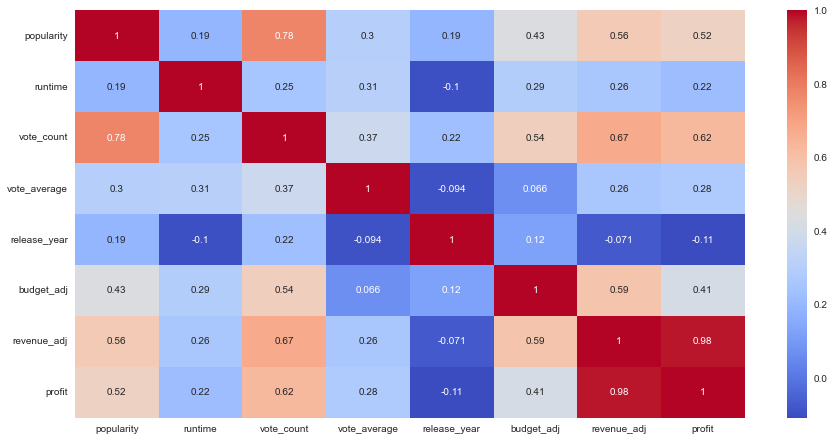

In [72]:
movies['profit'] = movies['revenue_adj'] - movies['budget_adj']
plt.figure(figsize=(15, 7.5))
c_relation = movies.corr()
sns.heatmap(c_relation, cmap='coolwarm', annot=True)
c_relation

<a id='conclusions'></a>
## Conclusions

> - The average runtime of majority of the movies is between 90 and 110 minutes.
> - The genres with the most popularity are adventure and animation while history and music are the least liked genres.
> - The movie runtimes have not changed much over the years and are largely around 110 minutes.
> - Genres that resulted in the most revenue are action and drama.
> - The ***longest*** movie in the dataset is called ***The Story of Film: An Odyssey*** and has a runtime of ***900 minutes.***
> - The ***shortest*** movies in the dataset are Mythica: The Necromancer, Ronaldo, Anarchy Parlor, Quatre Ã©toiles, Jean-Philippe, Mission Kashmir and have a length of ***61 minutes*** each.
> - From the heatmap, we can see that many attributes have a high positive correlation with one another which also shows how co-dependent they are. Popularity has a high positive correllation with vote counts and profits which implies that the higher the vote count, the more popular a movie becomes and that also results in more profit.


### Limitations

> I had to remove all zero values from budget and revenue columns because they would have affected the accuracy of my conclusions from the analysis. There are still a few outliers even after the omissions but even then we can still see that there is a positive correlation between both budget and number of votes with revenue

### References
Mohamed Saied, Github
https://github.com/Mohamedsaeed94/

https://towardsdatascience.com/data-visualization-how-to-choose-the-right-chart-part-1-d4c550085ea7